In [ ]:
 '''ASSIGNMENT 3:Design RNN or its variant including LSTM or GRU
a) Select a suitable time series dataset.
Example – predict sentiments based on product reviews
b) Apply for prediction'''

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

C:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 527ms/step - accuracy: 0.6823 - loss: 0.5889 - val_accuracy: 0.8554 - val_loss: 0.3448
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 521ms/step - accuracy: 0.8926 - loss: 0.2719 - val_accuracy: 0.8610 - val_loss: 0.3431
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 527ms/step - accuracy: 0.9269 - loss: 0.1995 - val_accuracy: 0.8578 - val_loss: 0.3233
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 528ms/step - accuracy: 0.9454 - loss: 0.1577 - val_accuracy: 0.8628 - val_loss: 0.3488
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 515ms/step - accuracy: 0.9578 - loss: 0.1199 - val_accuracy: 0.8518 - val_loss: 0.3839


782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8593 - loss: 0.3944
Test Accuracy: 86.04%
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step


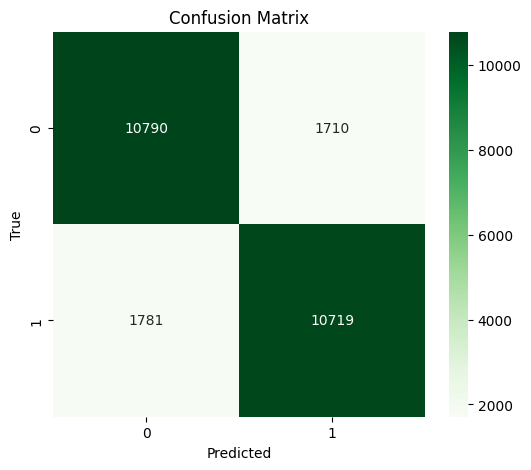

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86     12500
    Positive       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [4]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))